In [1]:
import pandas as pd
df = pd.read_csv(r"renamed_combined_data.csv")

In [2]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

                                    Missing Values  Percentage
Urine_Nicotine                                8706   94.078236
Age_Under_24_Months                           8657   93.548736
Pregnancy_Status                              8144   88.005187
Age_High_BP_Onset                             7117   76.907283
Highest_Education_Level                       6948   75.081046
Total_Nicotine_Equivalents                    6569   70.985520
Insulin                                       6429   69.472660
Fasting_Glucose                               6363   68.759455
Fasting_Subsample_Weight                      6218   67.192565
Age_19_Or_Less                                5821   62.902529
Marital_Status                                3685   39.820618
Highest_Degree_Obtained                       3685   39.820618
Glycohemoglobin                               3209   34.676896
Doctor_Reported_High_Cholesterol              3093   33.423384
Doctor_Approved_High_BP                       3093   33

In [3]:
# Create new average variables and drop the original columns
df['Avg_Diastolic_BP'] = df[['Diastolic_BP_1', 'Diastolic_BP_2', 'Diastolic_BP_3']].mean(axis=1)
df['Avg_Systolic_BP'] = df[['Systolic_BP_1', 'Systolic_BP_2', 'Systolic_BP_3']].mean(axis=1)
df.drop(columns=['Diastolic_BP_1', 'Diastolic_BP_2', 'Diastolic_BP_3',
                 'Systolic_BP_1', 'Systolic_BP_2', 'Systolic_BP_3'], inplace=True)

In [4]:
# Drop the household information variables
df.drop(columns=['Household_Reference_Gender', 'Household_Reference_Marital_Status', 'Household_Reference_Education', 'Household_Reference_Age', 'Exam_Weight', 'Interview_Weight'], inplace=True)

# Drop the categorical age variables
df.drop(columns=['Children_Under_5', 'Children_Aged_6_17', 'Adults_Aged_60_Plus', 'Age_Under_24_Months', 'Age_19_Or_Less',], inplace=True)

In [5]:
# Check the shape of the dataset and missing values again
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 9254, Number of Columns: 30
                                  Missing Values  Percentage
Urine_Nicotine                              8706   94.078236
Pregnancy_Status                            8144   88.005187
Age_High_BP_Onset                           7117   76.907283
Highest_Education_Level                     6948   75.081046
Total_Nicotine_Equivalents                  6569   70.985520
Insulin                                     6429   69.472660
Fasting_Glucose                             6363   68.759455
Fasting_Subsample_Weight                    6218   67.192565
Highest_Degree_Obtained                     3685   39.820618
Marital_Status                              3685   39.820618
Glycohemoglobin                             3209   34.676896
Doctor_Reported_High_Cholesterol            3093   33.423384
Doctor_Approved_High_BP                     3093   33.423384
Avg_Systolic_BP                             2540   27.447590
Avg_Diastolic_BP                         

In [6]:
# Remove rows where Pregnancy_Status = 1 or 3
df = df[~df['Pregnancy_Status'].isin([1, 3])]

In [7]:
# Remove participant who is younger than 20 years old
df['Participant_Age'] = df['Participant_Age'].astype(int)
df = df[df['Participant_Age'] >= 20]

In [8]:
# Check the shape of the dataset and missing values again
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 5425, Number of Columns: 30
                                  Missing Values  Percentage
Highest_Education_Level                     5425  100.000000
Urine_Nicotine                              4991   92.000000
Pregnancy_Status                            4459   82.193548
Total_Nicotine_Equivalents                  3778   69.640553
Age_High_BP_Onset                           3315   61.105991
Insulin                                     3070   56.589862
Fasting_Glucose                             3021   55.686636
Fasting_Subsample_Weight                    2921   53.843318
Income_to_Poverty_Ratio                      753   13.880184
Total_Cholesterol                            557   10.267281
Avg_Systolic_BP                              509    9.382488
Avg_Diastolic_BP                             509    9.382488
Pulse_Status                                 488    8.995392
Glycohemoglobin                              476    8.774194
BMI                                      

In [9]:
# Remove columns with missing value percentage > 50%
df.drop(columns=['Urine_Nicotine', 'Pregnancy_Status', 'Age_High_BP_Onset', 'Highest_Education_Level', 'Total_Nicotine_Equivalents', 'Insulin', 'Fasting_Glucose', 'Fasting_Subsample_Weight'], inplace=True)

In [10]:
# Check the shape of the dataset and missing values again
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 5425, Number of Columns: 22
                                  Missing Values  Percentage
Income_to_Poverty_Ratio                      753   13.880184
Total_Cholesterol                            557   10.267281
Avg_Systolic_BP                              509    9.382488
Avg_Diastolic_BP                             509    9.382488
Pulse_Status                                 488    8.995392
Glycohemoglobin                              476    8.774194
BMI                                          340    6.267281
Weight                                       330    6.082949
Height                                       330    6.082949
Household_Income                             304    5.603687
US_Citizen                                     3    0.055300
Doctor_Reported_High_Cholesterol               0    0.000000
Doctor_Approved_High_BP                        0    0.000000
Respondent_ID                                  0    0.000000
Birth_Country                            

In [11]:
# Drop rows where 'income_to_Poverty_ration' has missing values
df = df.dropna(subset=['Income_to_Poverty_Ratio'])

# Drop race category 1
df.drop(columns=['Race_Category_1'], inplace=True)

In [12]:
# Check the shape of the dataset and missing values again
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 4672, Number of Columns: 21
                                  Missing Values  Percentage
Total_Cholesterol                            426    9.118151
Avg_Systolic_BP                              374    8.005137
Avg_Diastolic_BP                             374    8.005137
Glycohemoglobin                              362    7.748288
Pulse_Status                                 359    7.684075
BMI                                          254    5.436644
Weight                                       246    5.265411
Height                                       244    5.222603
Household_Income                              13    0.278253
US_Citizen                                     1    0.021404
Doctor_Reported_High_Cholesterol               0    0.000000
Doctor_Approved_High_BP                        0    0.000000
Respondent_ID                                  0    0.000000
Birth_Country                                  0    0.000000
Participant_Age                          

In [13]:
# Drop weight and height columns
df.drop(columns=['Weight', 'Height'], inplace=True)

In [14]:
# Check the shape of the dataset and missing values again
print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df.sort_values(by='Percentage', ascending=False))

Number of Rows: 4672, Number of Columns: 19
                                  Missing Values  Percentage
Total_Cholesterol                            426    9.118151
Avg_Systolic_BP                              374    8.005137
Avg_Diastolic_BP                             374    8.005137
Glycohemoglobin                              362    7.748288
Pulse_Status                                 359    7.684075
BMI                                          254    5.436644
Household_Income                              13    0.278253
US_Citizen                                     1    0.021404
Doctor_Reported_High_Cholesterol               0    0.000000
Doctor_Approved_High_BP                        0    0.000000
Respondent_ID                                  0    0.000000
Race_Category_3                                0    0.000000
Birth_Country                                  0    0.000000
Participant_Gender                             0    0.000000
Income_to_Poverty_Ratio                  

In [15]:
# Mapping categorical values to actual income values
income_mapping = {
    1: 2500, 2: 7500, 3: 12500, 4: 17500, 5: 22500,
    6: 30000, 7: 40000, 8: 50000, 9: 60000, 10: 70000,
    12: 35000, 13: 10000, 14: 87500, 15: 100000
}

df['Household_Income'] = df['Household_Income'].replace(income_mapping)

# Remove rows where Household_Income is 77 or 99
df = df[~df['Household_Income'].isin([77, 99])]

In [16]:
# Define mappings for each variable
us_citizen_mapping = {1: 'Citizen', 2: 'Not a US Citizen', 7: 'Refused', 9: 'Don’t Know'}
doctor_reported_cholesterol_mapping = {1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don’t Know'}
doctor_approved_bp_mapping = {1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don’t Know'}
birth_country_mapping = {1: 'Born in US', 2: 'Other Country', 7: 'Refused', 9: 'Don’t Know'}
pulse_status_mapping = {1: 'Regular', 2: 'Irregular'}
participant_gender_mapping = {1: 'Male', 2: 'Female'}
marital_status_mapping = {
    1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated', 5: 'Never Married', 
    6: 'Living with Partner', 77: 'Refused', 99: 'Don’t Know'
}
highest_degree_obtained_mapping = {
    1: 'Less than 9th Grade', 2: '9-11th Grade', 3: 'High School Graduate',
    4: 'Some College/AA Degree', 5: 'College Graduate or Above', 7: 'Refused', 9: 'Don’t Know'
}
race_category_3_mapping = {
    1: 'Mexican American', 2: 'Other Hispanic', 3: 'White', 4: 'Black', 
    6: 'Asian', 7: 'Multiracial'
}

df['US_Citizen'] = df['US_Citizen'].map(us_citizen_mapping)
df['Pulse_Status'] = df['Pulse_Status'].map(pulse_status_mapping)
df['Doctor_Reported_High_Cholesterol'] = df['Doctor_Reported_High_Cholesterol'].map(doctor_reported_cholesterol_mapping)
df['Doctor_Approved_High_BP'] = df['Doctor_Approved_High_BP'].map(doctor_approved_bp_mapping)
df['Birth_Country'] = df['Birth_Country'].map(birth_country_mapping)
df['Participant_Gender'] = df['Participant_Gender'].map(participant_gender_mapping)
df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)
df['Highest_Degree_Obtained'] = df['Highest_Degree_Obtained'].map(highest_degree_obtained_mapping)
df['Race_Category_3'] = df['Race_Category_3'].map(race_category_3_mapping)

In [17]:
# Check categorical variable distributions
categorical_vars = ['Pulse_Status', 'US_Citizen', 'Doctor_Reported_High_Cholesterol', 
                    'Doctor_Approved_High_BP', 'Marital_Status', 'Highest_Degree_Obtained', 
                    'Race_Category_3','Birth_Country', 'Participant_Gender']

In [18]:
# Check for NaN or inf values
import numpy as np
print("Missing values per column:\n", df.isna().sum())
print("Infinite values per column:\n", df.replace([np.inf, -np.inf], np.nan).isna().sum())

# Handle NaN and inf values (replace or drop)
df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
df = df.fillna(0)  # Replace NaN with 0

# Perform one-hot encoding
cleaned_df = pd.get_dummies(df, columns=categorical_vars, drop_first=True).astype(int)

print(cleaned_df.shape)
cleaned_df.head()

Missing values per column:
 Respondent_ID                         0
Birth_Country                         1
US_Citizen                            1
Highest_Degree_Obtained               0
Household_Size                        0
Marital_Status                        0
Income_to_Poverty_Ratio               0
Household_Income                     13
Participant_Gender                    0
Participant_Age                       0
Race_Category_3                       0
Pulse_Status                        355
BMI                                 250
Total_Cholesterol                   421
Glycohemoglobin                     357
Doctor_Approved_High_BP               0
Doctor_Reported_High_Cholesterol      0
Avg_Diastolic_BP                    370
Avg_Systolic_BP                     370
dtype: int64
Infinite values per column:
 Respondent_ID                         0
Birth_Country                         1
US_Citizen                            1
Highest_Degree_Obtained               0
Household_

,Respondent_ID,Household_Size,Income_to_Poverty_Ratio,Household_Income,Participant_Age,BMI,Total_Cholesterol,Glycohemoglobin,Avg_Diastolic_BP,Avg_Systolic_BP,...,Highest_Degree_Obtained_Refused,Highest_Degree_Obtained_Some College/AA Degree,Race_Category_3_Black,Race_Category_3_Mexican American,Race_Category_3_Multiracial,Race_Category_3_Other Hispanic,Race_Category_3_White,Birth_Country_Born in US,Birth_Country_Other Country,Participant_Gender_Male
2,93705,1,0,12500,66,31,157,6,62,202,...,0,0,1,0,0,0,0,1,0,0
5,93708,2,1,30000,66,23,209,6,77,141,...,0,0,0,0,0,0,0,0,1,0
6,93709,1,0,7500,75,38,176,6,66,118,...,0,1,1,0,0,0,0,1,0,0
8,93711,3,5,100000,56,21,238,5,66,101,...,0,0,0,0,0,0,0,0,1,1
10,93713,1,2,30000,67,23,184,5,72,104,...,0,0,0,0,0,0,1,1,0,1


In [19]:
cleaned_df.columns 

Index(['Respondent_ID', 'Household_Size', 'Income_to_Poverty_Ratio',
       'Household_Income', 'Participant_Age', 'BMI', 'Total_Cholesterol',
       'Glycohemoglobin', 'Avg_Diastolic_BP', 'Avg_Systolic_BP',
       'Pulse_Status_Irregular', 'Pulse_Status_Regular', 'US_Citizen_Citizen',
       'US_Citizen_Don’t Know', 'US_Citizen_Not a US Citizen',
       'US_Citizen_Refused', 'Doctor_Reported_High_Cholesterol_No',
       'Doctor_Reported_High_Cholesterol_Refused',
       'Doctor_Reported_High_Cholesterol_Yes', 'Doctor_Approved_High_BP_No',
       'Doctor_Approved_High_BP_Yes', 'Marital_Status_Living with Partner',
       'Marital_Status_Married', 'Marital_Status_Never Married',
       'Marital_Status_Refused', 'Marital_Status_Separated',
       'Marital_Status_Widowed',
       'Highest_Degree_Obtained_College Graduate or Above',
       'Highest_Degree_Obtained_Don’t Know',
       'Highest_Degree_Obtained_High School Graduate',
       'Highest_Degree_Obtained_Less than 9th Grade',
     

In [20]:
print(cleaned_df.dtypes)

Respondent_ID                                        int32
Household_Size                                       int32
Income_to_Poverty_Ratio                              int32
Household_Income                                     int32
Participant_Age                                      int32
BMI                                                  int32
Total_Cholesterol                                    int32
Glycohemoglobin                                      int32
Avg_Diastolic_BP                                     int32
Avg_Systolic_BP                                      int32
Pulse_Status_Irregular                               int32
Pulse_Status_Regular                                 int32
US_Citizen_Citizen                                   int32
US_Citizen_Don’t Know                                int32
US_Citizen_Not a US Citizen                          int32
US_Citizen_Refused                                   int32
Doctor_Reported_High_Cholesterol_No                  int

In [21]:
# Add a new column 'Diabetes_Risk' to classify Glycohemoglobin levels
cleaned_df['Diabetes_Risk'] = cleaned_df['Glycohemoglobin'].apply(lambda x: 1 if x >= 5.7 else 0)

# Display the first few rows to confirm
print(cleaned_df[['Glycohemoglobin', 'Diabetes_Risk']].head())

    Glycohemoglobin  Diabetes_Risk
2                 6              1
5                 6              1
6                 6              1
8                 5              0
10                5              0


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 545.5594781168514, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.76
Confusion Matrix:
[[961  78]
 [251 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1039
           1       0.58      0.30      0.39       357

    accuracy                           0.76      1396
   macro avg       0.68      0.61      0.62      1396
weighted avg       0.74      0.76      0.74      1396



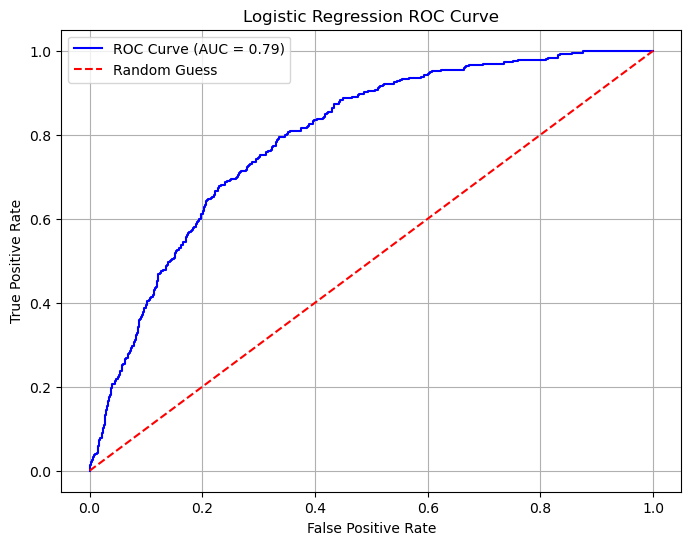

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the target variable
y = cleaned_df['Diabetes_Risk']

# Define the feature set excluding specified variables
excluded_columns = [
    'Respondent_ID', 'Glycohemoglobin', 'US_Citizen_Don’t Know', 
    'Doctor_Reported_High_Cholesterol_No', 'Doctor_Reported_High_Cholesterol_Refused', 'Marital_Status_Living with Partner', 
    'Highest_Degree_Obtained_Some College/AA Degree', 'Race_Category_3_Other Hispanic',  'Doctor_Approved_High_BP_No',
       'Doctor_Approved_High_BP_Yes', 'Diabetes_Risk'
]

X = cleaned_df.drop(columns=excluded_columns)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = [
    {
        'penalty': ['l2'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'newton-cg', 'sag'],  # Only solvers that support 'l2'
        'max_iter': [100, 1000, 2500, 5000]
    },
    {
        'penalty': ['l1'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'saga'],  # Solvers that support 'l1'
        'max_iter': [100, 1000, 2500, 5000]
    },
    {
        'penalty': ['elasticnet'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['saga'],  # Only solver supporting 'elasticnet'
        'l1_ratio': [0.2, 0.5, 0.8],  # l1_ratio required for 'elasticnet'
        'max_iter': [100, 1000, 2500, 5000]
    }
]
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    n_jobs=-1,          # Use all CPU cores
    verbose=3           # Display detailed progress
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = grid_search.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.grid()
plt.show()

Best Parameters: {'bootstrap': True, 'max_features': 19, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 2024}
Accuracy: 0.77
Confusion Matrix:
[[958  81]
 [237 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1039
           1       0.60      0.34      0.43       357

    accuracy                           0.77      1396
   macro avg       0.70      0.63      0.64      1396
weighted avg       0.75      0.77      0.75      1396



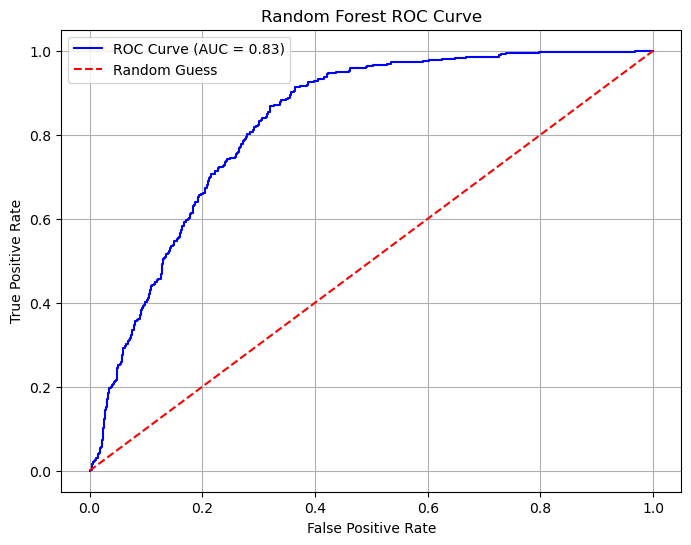

In [24]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# Define the target variable
y = cleaned_df['Diabetes_Risk']

# Define the feature set excluding specified variables
excluded_columns = [
    'Respondent_ID', 'Glycohemoglobin', 'US_Citizen_Don’t Know', 
    'Doctor_Reported_High_Cholesterol_No', 'Doctor_Reported_High_Cholesterol_Refused', 'Marital_Status_Living with Partner', 
    'Highest_Degree_Obtained_Some College/AA Degree', 'Race_Category_3_Other Hispanic', 'Doctor_Approved_High_BP_No',
    'Doctor_Approved_High_BP_Yes', 'Diabetes_Risk'
]
X = cleaned_df.drop(columns=excluded_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define the parameter grid
grid_values = {
        'max_features': np.linspace(1,X_train.shape[1],X_train.shape[1], dtype='int32'),
        'min_samples_leaf': [5],
        'n_estimators': [500],
        'random_state': [2024],
    'bootstrap': [True, False]                 
}

# Create a Random Forest model
rfc = RandomForestClassifier()


# Apply GridSearchCV
rfc_cv = GridSearchCV(rfc, param_grid=grid_values, scoring='accuracy', cv=10,verbose=0,n_jobs=-1)


# Fit the model
rfc_cv.fit(X_train, y_train)

rfc_cv_pred = rfc_cv.best_estimator_.predict(X_test)

# Get the best parameters and the best model
best_params = rfc_cv.best_params_
best_model = rfc_cv.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Get predicted probabilities for ROC curve and AUC
y_prob = rfc_cv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid()
plt.show()